# Load Data 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X_train = np.load('data/X_train.npy')
X_test = np.load('data/X_test.npy')
y_train = np.load('data/y_train.npy')
y_test = np.load('data/y_test.npy')
train_y = np.load('data/train_y.npy')
test_y = np.load('data/test_y.npy')
max_length = int(np.load('data/max.npy'))

# LSTM 

In [2]:
from keras.layers import LSTM
from keras import optimizers
from keras import layers
from keras import models
from keras.callbacks import History 
from keras.utils import np_utils
history = History()

if y_train.shape[-1] > 10:
    num_classes = 2
    activation = 'sigmoid'
    loss = 'brinary_crossentropy'
else:
    num_classes = 10
    y_train = np_utils.to_categorical(y_train, num_classes)
    y_test = np_utils.to_categorical(y_test, num_classes)
    activation = 'softmax'
    loss = 'categorical_crossentropy'

batch_size = 32
epochs = 10 

model = models.Sequential()
model.add(LSTM(1, input_shape = (max_length, X_train.shape[-1])))
model.add(layers.Dense(1, activation=activation))

model.compile(loss=loss,
              optimizer= optimizers.Adam(lr =0.01),
              metrics=['accuracy'])


model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test),
          callbacks=[history])

train_score = model.evaluate(X_train, y_train, verbose=0)
print('Train loss: {}, Train accuracy: {}'.format(train_score[0], train_score[1]))
test_score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy: {}'.format(test_score[0], test_score[1]))

/home/rommeltf/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Train on 364 samples, validate on 41 samples
Epoch 1/10
364/364 [==============================] - 24s 66ms/step - loss: 0.6928 - acc: 0.5082 - val_loss: 0.6911 - val_acc: 0.4634
Epoch 2/10
364/364 [==============================] - 23s 63ms/step - loss: 0.6918 - acc: 0.5137 - val_loss: 0.6877 - val_acc: 0.6585
Epoch 3/10
364/364 [==============================] - 23s 63ms/step - loss: 0.6900 - acc: 0.5769 - val_loss: 0.6806 - val_acc: 0.7561
Epoch 4/10
364/364 [==============================] - 23s 64ms/step - loss: 0.6876 - acc: 0.5632 - val_loss: 0.6688 - val_acc: 0.7561
Epoch 5/10
364/364 [==============================] - 23s 64ms/step - loss: 0.6845 - acc: 0.5632 - val_loss: 0.6493 - val_acc: 0.7561
Epoch 6/10
364/364 [==============================] - 23s 64ms/step - loss: 0.6776 - acc: 0.5907 - val_loss: 0.6411 - val_acc: 0.6829
Epoch 7/10
364/364 [==============================] - 23s 63ms/step - loss: 0.6725 - acc: 0.5989 - val_loss: 0.6203 - val_acc: 0.7073
Epoch 8/10
364/36

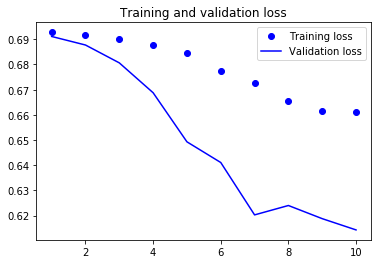

In [4]:
### Plot Losss
def plot_loss():
    acc = history.history['acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_loss()

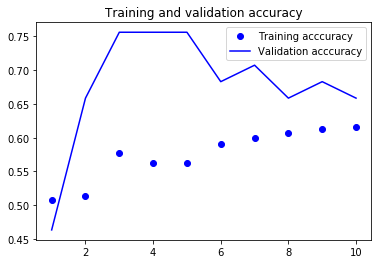

In [6]:
### Plot accuracy 

def plot_accuracy():
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    epochs = range(1, len(acc) + 1)
    plt.figure()
    plt.plot(epochs, acc, 'bo', label='Training acccuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation acccuracy')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()
    
plot_accuracy()

In [19]:
#Test Data 

from sklearn.metrics import classification_report
import numpy as np

#y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.70      0.64      0.67        22
          1       0.62      0.68      0.65        19

avg / total       0.66      0.66      0.66        41



In [20]:
# Train data 

#y_test = np.argmax(y_test, axis=1) # Convert one-hot to index
y_pred = model.predict_classes(X_train)
print(classification_report(y_train, y_pred))

             precision    recall  f1-score   support

          0       0.62      0.62      0.62       183
          1       0.61      0.61      0.61       181

avg / total       0.62      0.62      0.62       364



# Bidirectional LSTM

In [5]:
from keras.layers import Bidirectional

model = models.Sequential()
model.add(Bidirectional(LSTM(1), input_shape = (max_length, X_train.shape[-1])))
model.add(layers.Dense(1, activation=activation))

model.compile(optimizer=optimizers.Adam(lr=.01),
              loss=loss,
              metrics=['acc'])

history = model.fit(X_train, y_train , epochs=10, batch_size=64, validation_split=0.10)

Train on 327 samples, validate on 37 samples
Epoch 1/10
327/327 [==============================] - 23s 70ms/step - loss: 0.6931 - acc: 0.4801 - val_loss: 0.6990 - val_acc: 0.5405
Epoch 2/10
327/327 [==============================] - 21s 66ms/step - loss: 0.6930 - acc: 0.4893 - val_loss: 0.6991 - val_acc: 0.5405
Epoch 3/10
327/327 [==============================] - 22s 66ms/step - loss: 0.6930 - acc: 0.4954 - val_loss: 0.6991 - val_acc: 0.5135
Epoch 4/10
327/327 [==============================] - 22s 66ms/step - loss: 0.6929 - acc: 0.4924 - val_loss: 0.6990 - val_acc: 0.5405
Epoch 5/10
327/327 [==============================] - 22s 67ms/step - loss: 0.6929 - acc: 0.4985 - val_loss: 0.6990 - val_acc: 0.4595
Epoch 6/10
327/327 [==============================] - 22s 66ms/step - loss: 0.6929 - acc: 0.4893 - val_loss: 0.6989 - val_acc: 0.4865
Epoch 7/10
327/327 [==============================] - 22s 66ms/step - loss: 0.6928 - acc: 0.4954 - val_loss: 0.6988 - val_acc: 0.4595
Epoch 8/10
327/32

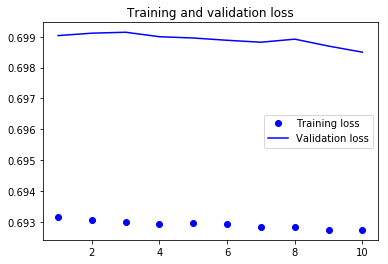

In [7]:
plot_loss()

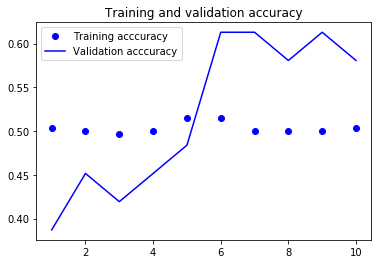

In [7]:
plot_accuracy()